# Integrating Snowpack Data Analysis within the SWE Workflow


## Chapter 1 : Introduction


In this opening chapter, we explore the crucial importance of snowpack data analysis, with a spotlight on Snow Telemetry (SNOTEL) and the California Data Exchange Center (CDEC) stations. These hubs are central to the surveillance and understanding of snowpack fluctuations across the Western United States, areas where the measurement of snowpack is vital to predicting water cycles. The data collected are invaluable for managing water resources, conducting climatic research, and safeguarding environmental integrity. We will particularly focus on the integration of snowpack data within the SWE (Snow Water Equivalent) Workflow, illustrating how it forms the backbone of water supply forecasting models, informs conservation tactics, and aids in the stewardship of water resources. Integrating snowpack data into the SWE Workflow is an exercise in weaving quantifiable data into the fabric of the communities reliant on these resources, bridging the gap between numerical data and real-world applications


### 1.2. Objectives

- Understand the importance of snowpack data.
- Discover how to streamline the acquisition, manipulation, and examination of snowpack data through Python automation.


## Chapter 2: Setting Up Your Environment

## 2.1.1. Getting Started

### 2.1. Prerequisites

**. Python 3.x**


**. Libraries: math, json, requests, pandas, csv, io, os, dask**


**. A working directory for storing downloaded files**

### 2.2. Environment Preparation

Instructions on setting up the Python environment, installing necessary libraries using pip, and organizing your workspace for efficient data handling.


### 2.3.1. Setup

In [1]:
#Step 0: Import Libraries
import requests
import pandas as pd
import json


In [2]:
# Constants
WORK_DIR = './path'
STATION_JSON_URL = "https://wcc.sc.egov.usda.gov/awdbRestApi/services/v1/stations?activeOnly=true&returnForecastPointMetadata=false&returnReservoirMetadata=false&returnStationElements=false"
OUTPUT_JSON_FILE = f'{WORK_DIR}/all_snotel_cdec_stations.json'
OUTPUT_CSV_FILE = f'{WORK_DIR}/all_snotel_cdec_stations.csv'

In this script, the WORK_DIR variable is set to a specific path on your local file system where the workflow's data files will be stored. This includes input data, intermediate processing files, and final outputs. 


## Chapter 3: Gathering Snowpack Data
### 3.1. Data Access Methods

In this section, we provide a succinct introduction to APIs, short for Application Programming Interfaces, emphasizing their role in enabling access to SNOTEL and CDEC station data. The objective is to understand how these APIs serve as a gateway to the data streams, rather than expounding on the underlying technicalities of HTTP protocols and data fetching techniques. We'll focus on practical examples showing how API endpoints are constructed and used to retrieve the snowpack data that drives our analysis in the SWE workflow.

### 3.2. Writing the Download Function

Explains the `download_station_json` function, which uses the `requests` library to fetch JSON data from the SNOTEL and CDEC API. This section includes handling HTTP responses to ensure successful data retrieval.


In [3]:
# Step 1: Download Station Data
def download_station_json():
    response = requests.get(STATION_JSON_URL)
    if response.status_code == 200:
        with open(OUTPUT_JSON_FILE, 'w') as json_file:
            json.dump(response.json(), json_file, indent=2)
        print("Data downloaded and saved.")
    else:
        print("Failed to download data. Status code:", response.status_code)

## Chapter 4: Transforming Data Formats

### 4.1. From JSON to CSV

Discusses the rationale behind converting JSON data to CSV format for easier manipulation and analysis. It includes a step-by-step guide on using the `pandas` library for the conversion process.


### 4.2. Implementing the Conversion

Detailed explanation of the `convert_json_to_csv` function, illustrating how to read JSON from a file, normalize nested JSON into a flat table, and save the result as a CSV file.


In [4]:
# Step 2: Convert JSON to CSV
def convert_json_to_csv():
    with open(OUTPUT_JSON_FILE, 'r') as json_file:
        data = json.load(json_file)
    df = pd.json_normalize(data)
    df.to_csv(OUTPUT_CSV_FILE, index=False)
    print("JSON converted to CSV.")

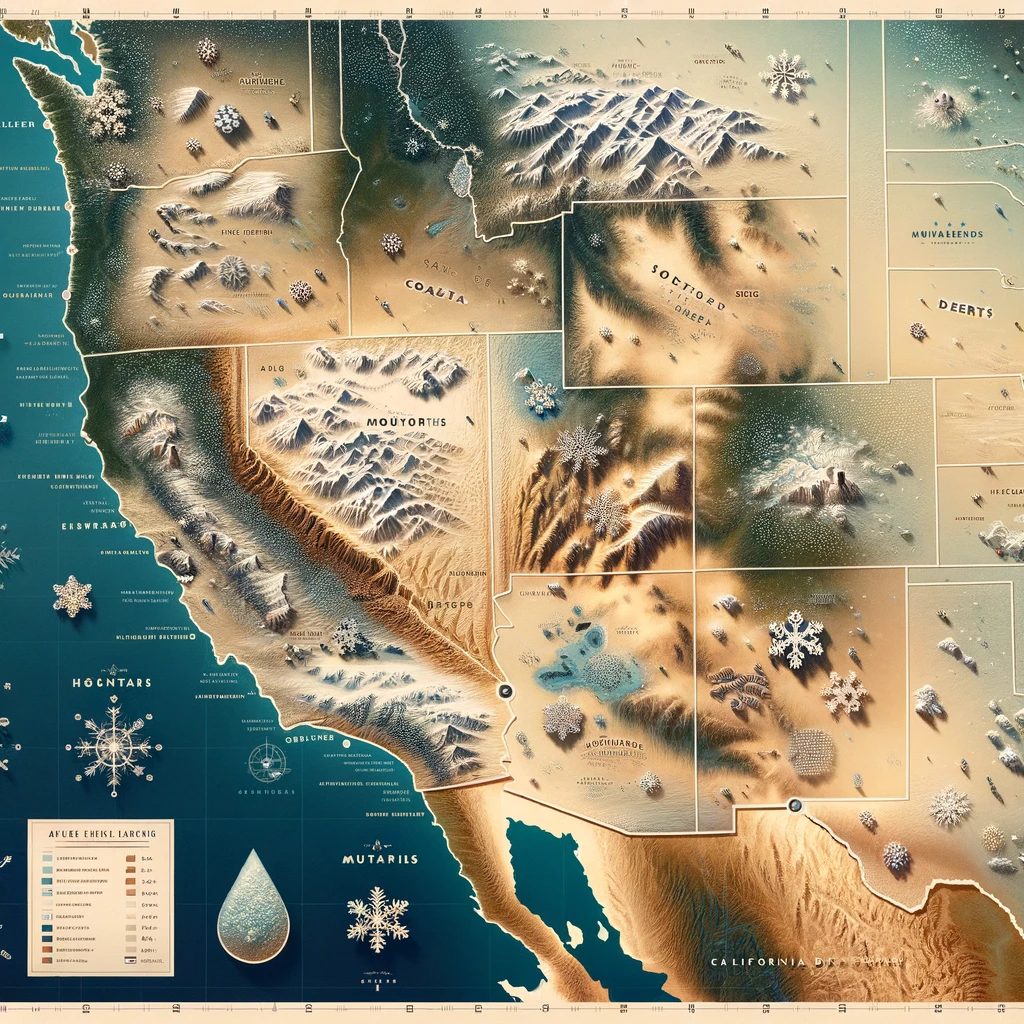


The image presents a stylized map of the Western United States, artfully rendered to showcase diverse terrains—from the verdant coastal areas along the Pacific Ocean to the arid expanses of deserts and the rugged outlines of mountain ranges. Overlaying this colorful backdrop, small yet distinct icons pinpoint the locations of environmental monitoring stations: snowflakes representing SNOTEL stations are scattered with a noticeable density in the mountainous regions, indicative of their role in snowpack monitoring, while water droplets mark the CDEC stations, suggesting their focus on water data collection. The map features a variety of soft earth tones that seamlessly blend to demarcate different landscapes, enhancing visual clarity and appeal. On one side, a legend succinctly explains the symbols used, with brief descriptions for each type of station, facilitating an immediate understanding of the map's content at a glance. This imaginative depiction encapsulates the extensive network of data collection sites, providing a clear and engaging visual reference for the distribution and focus areas of these critical environmental monitoring efforts.

## Chapter 5: Identifying Key Data Points

### Chapter 5: Selecting Essential Stations


In this segment, we delve into the necessity of filtering through the plethora of SNOTEL and CDEC stations. The landscape of data collection is vast and varied, with each station providing a unique snapshot of snowpack conditions across different geographical locales. However, not all stations are relevant to every analysis or study. The precision in our environmental assessments hinges on our ability to select stations that offer data directly relevant to our specific objectives.


### 5.2. Crafting the Filter

Provides an in-depth look at the `filter_stations` function, demonstrating how to use `pandas` to apply filters to the CSV data. This section explains selecting rows based on conditions, such as latitude greater than 40 degrees.


In [5]:
# Step 3: Filter Stations (Example filtering logic; adjust as needed)
def filter_stations():
    df = pd.read_csv(OUTPUT_CSV_FILE)
    # Example filter: Latitude > 40
    filtered_df = df[df['latitude'] > 40]
    print(filtered_df.head())


The filter_stations function in the script plays a critical role in enhancing the precision of our snowpack data analysis. By applying filters to the comprehensive dataset, this function allows us to focus on stations that provide data most pertinent to our study's specific needs or hypotheses. In the provided example, the filter is set to select only those stations situated at latitudes greater than 40 degrees. This criterion could be aligned with the study's geographic focus, perhaps targeting regions known for significant snowpack levels or particular climatic patterns. The filtered dataset, represented by filtered_df, then becomes the foundation for more targeted and relevant analysis within the scope of our workflow. This approach exemplifies how filtering can significantly streamline the data preparation process, ensuring that subsequent analysis is both relevant and manageable.

## Chapter 6: Conclusion and Next Steps

### 6.1. Review

Summarizes the script's functionality and the theoretical knowledge provided in the previous chapters, reinforcing the importance of each step in the data analysis process.


In [6]:
# Step 4: Main function to execute the steps
def main():
    download_station_json()
    convert_json_to_csv()
    filter_stations()

if __name__ == "__main__":
    main()

Data downloaded and saved.
JSON converted to CSV.
    stationTriplet stationId stateCode networkCode                    name  \
2     0010:ID:COOP      0010        ID        COOP  Aberdeen Experimnt Stn   
3    1F01A:BC:SNOW     1F01A        BC        SNOW           Aberdeen Lake   
6    13E19:ID:SNOW     13E19        ID        SNOW           Above Gilmore   
7    15B07:ID:SNOW     15B07        ID        SNOW            Above Roland   
9  06110500:MT:BOR  06110500        MT         BOR             Ackley Lake   

  dcoCode    countyName           huc  elevation  latitude  longitude  \
2      ID       Bingham  1.704021e+11     4410.0  42.95000 -112.83333   
3      OR       UNKNOWN           NaN     4298.0  50.14733 -119.05340   
6      ID         Lemhi  1.706020e+11     8289.0  44.45615 -113.30097   
7      ID      Shoshone  1.701030e+11     4347.0  47.38507 -115.66405   
9      MT  Judith Basin  1.004010e+11     4300.0  46.95741 -109.94062   

   dataTimeZone pedonCode shefId          

The filter_stations() function in the context of snowpack data analysis using Python is designed to sift through a dataset of weather stations, selecting only those that meet certain predefined criteria. This function is crucial for narrowing down a large set of data to a more manageable subset that is directly relevant to the specific objectives of the analysis. For example, if the analysis focuses on regions at higher altitudes, the function might filter out stations located at latitudes greater than a specified threshold. This targeted selection process enables more focused and efficient analysis by concentrating on data points that are most likely to yield meaningful insights for the study at hand.

This Python script is not merely a procedural tool but a critical component of our SWE workflow, systematically addressing the data preparation phase essential for snowpack analysis. By structuring the script around the main() function, which oversees the downloading of JSON data, conversion to CSV format, and selective filtering of stations, we align our data processing efforts directly with the workflow’s analytical objectives. The script’s standalone execution capability, as delineated by the if __name__ == "__main__": condition, ensures that it serves a dual purpose: it can be utilized independently for specific data manipulation tasks or as an integrated step within a larger sequence of workflow operations, enhancing both flexibility and efficiency.

In essence, this script embodies the workflow’s commitment to methodical data curation, preparing the ground for sophisticated analysis by ensuring that only the most relevant and accurately formatted data is carried forward. This deliberate preprocessing step is vital, as it directly influences the workflow's capability to generate meaningful insights into snowpack variations, ultimately supporting informed decision-making in water resource management and environmental protection efforts. Through this integration, the script exemplifies the symbiotic relationship between data preparation and analytical depth within the workflow, showcasing how foundational tasks contribute to the workflow’s overarching goal of delivering actionable snowpack data insights.

The script presumably performs the following operations:
1. **Downloading JSON Data**: It fetches weather station data in JSON format from a remote source or local storage.
2. **Converting JSON to CSV**: The JSON data is then converted into a more universally readable comma-separated values (CSV) format, facilitating easier data manipulation and analysis.
3. **Filtering Stations**: Lastly, the script filters the stations based on predefined criteria, which could include factors like geographic location, data availability period, or specific attributes of the stations. 

This process is essential for data preparation, especially in meteorological or geographical information system (GIS) applications, where handling large datasets and converting them into a more accessible format is a preliminary step for further analysis or visualization.

This structured approach is designed not only to provide readers with the foundational theory and practical skills required to leverage Python in analyzing snowpack data but also to underscore the significance of such data within broader environmental research and decision-making processes. By intricately weaving these Python scripts into our SWE workflow, we demonstrate how each step—from data retrieval and transformation to strategic filtering—serves as a crucial building block in a comprehensive analytical process. This integration ensures that the workflow not only facilitates the efficient handling and analysis of snowpack data but also enhances the ability of researchers and policymakers to make informed decisions based on robust environmental insights.

In essence, the culmination of this guide brings to light the pivotal role of Python scripting within our workflow, illustrating how such technical tasks are directly tied to the generation of actionable knowledge. This connection between data processing and workflow efficacy highlights the indispensable value of programming skills in environmental sciences, positioning Python as a key tool in the arsenal of researchers aiming to tackle pressing environmental challenges through informed analysis and strategic decision-making.